<a href="https://colab.research.google.com/github/Pandu98-pkh/UAS-Deep-Learning/blob/main/Chapter%2010%20Introduction%20to%20Artificial%20Neural%20Networks%20with%20Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 10: Introduction to Artificial Neural Networks with Keras
# Hands-On Machine Learning - Implementasi dan Penjelasan Teoretis

## Daftar Isi
1. [Pengantar](#pengantar)
2. [Dari Neuron Biologis ke Neuron Tiruan](#dari-neuron-biologis-ke-neuron-tiruan)
3. [Perceptron](#perceptron)
4. [Multilayer Perceptron dan Backpropagation](#multilayer-perceptron-dan-backpropagation)
5. [Implementasi MLP dengan Keras](#implementasi-mlp-dengan-keras)
6. [Functional API untuk Arsitektur Kompleks](#functional-api-untuk-arsitektur-kompleks)
7. [Subclassing API](#subclassing-api)
8. [Saving dan Loading Models](#saving-dan-loading-models)
9. [Callbacks](#callbacks)
10. [TensorBoard](#tensorboard)
11. [Hyperparameter Tuning](#hyperparameter-tuning)
12. [Best Practices dan Guidelines](#best-practices-dan-guidelines)
13. [Kesimpulan dan Rangkuman](#kesimpulan-dan-rangkuman)

## Pengantar

**Teori:**
Artificial Neural Networks (ANN) adalah salah satu algoritma machine learning yang paling powerful dan fleksibel. ANN terinspirasi dari cara kerja otak manusia, di mana informasi diproses oleh jaringan neuron yang saling terhubung.

**Mengapa Neural Networks Penting?**
- **Universal Approximation Theorem**: ANN dengan cukup neuron dapat mendekati fungsi kontinyu apa pun
- **Feature Learning**: Dapat otomatis belajar representasi fitur yang optimal dari data raw
- **Non-linearity**: Mampu memodelkan hubungan non-linear yang kompleks
- **Scalability**: Dapat menangani dataset yang sangat besar dan high-dimensional

**Aplikasi ANN:**
- **Computer Vision**: Image classification, object detection, segmentasi
- **Natural Language Processing**: Translation, sentiment analysis, chatbots
- **Speech Recognition**: Voice assistants, transcription
- **Recommendation Systems**: Netflix, Spotify, e-commerce
- **Game Playing**: AlphaGo, OpenAI Five, game AI
- **Medical Diagnosis**: Radiology, drug discovery
- **Autonomous Vehicles**: Perception, decision making

**Perkembangan Historis:**
- **1943**: McCulloch-Pitts neuron pertama
- **1957**: Perceptron oleh Frank Rosenblatt
- **1969**: Minsky & Papert tunjukkan keterbatasan Perceptron
- **1986**: Backpropagation algorithm oleh Rumelhart, Hinton, Williams
- **2006**: Deep Learning renaissance
- **2012**: AlexNet breakthrough dalam Computer Vision
- **2017**: Transformer architecture untuk NLP

In [1]:
# Import libraries yang diperlukan
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris, fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from functools import partial
import os
import time
import warnings
warnings.filterwarnings('ignore')

# Set random seed untuk reproducibility
np.random.seed(42)
tf.random.set_seed(42)

print(f"TensorFlow version: {tf.__version__}")
print(f"Keras version: {keras.__version__}")

TensorFlow version: 2.18.0
Keras version: 3.8.0


## 1. Dari Neuron Biologis ke Neuron Tiruan

### Penjelasan Teoritis: Neuron Biologis

Neuron biologis memiliki komponen utama:
- **Dendrit**: Menerima sinyal dari neuron lain
- **Soma (badan sel)**: Memproses sinyal
- **Akson**: Mengirim sinyal ke neuron lain
- **Sinapsis**: Penghubung antar neuron

### Model McCulloch-Pitts

Model pertama neuron tiruan yang sangat sederhana:
- Input biner (0 atau 1)
- Output biner
- Aktivasi berdasarkan threshold

In [2]:
# Implementasi sederhana neuron McCulloch-Pitts
def mcculloch_pitts_neuron(inputs, weights, threshold):
    """
    Implementasi neuron McCulloch-Pitts

    Args:
        inputs: list input (0 atau 1)
        weights: list bobot untuk setiap input
        threshold: nilai ambang batas

    Returns:
        output: 0 atau 1
    """
    weighted_sum = sum(i * w for i, w in zip(inputs, weights))
    return 1 if weighted_sum >= threshold else 0

# Contoh penggunaan - Logical AND
print("=== Logical AND dengan McCulloch-Pitts ===")
inputs_and = [
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
]

weights_and = [1, 1]  # Bobot untuk kedua input
threshold_and = 2     # Threshold = 2, sehingga kedua input harus 1

for inp in inputs_and:
    output = mcculloch_pitts_neuron(inp, weights_and, threshold_and)
    print(f"Input: {inp} -> Output: {output}")

print("\n=== Logical OR dengan McCulloch-Pitts ===")
weights_or = [1, 1]   # Bobot untuk kedua input
threshold_or = 1      # Threshold = 1, sehingga salah satu input 1 sudah cukup

for inp in inputs_and:
    output = mcculloch_pitts_neuron(inp, weights_or, threshold_or)
    print(f"Input: {inp} -> Output: {output}")

=== Logical AND dengan McCulloch-Pitts ===
Input: [0, 0] -> Output: 0
Input: [0, 1] -> Output: 0
Input: [1, 0] -> Output: 0
Input: [1, 1] -> Output: 1

=== Logical OR dengan McCulloch-Pitts ===
Input: [0, 0] -> Output: 0
Input: [0, 1] -> Output: 1
Input: [1, 0] -> Output: 1
Input: [1, 1] -> Output: 1


## 2. Perceptron

### Penjelasan Teoritis: Perceptron

Perceptron adalah evolusi dari model McCulloch-Pitts dengan beberapa perbedaan penting:
- **Input kontinu**: Tidak hanya 0 dan 1
- **Bobot yang dapat dipelajari**: Algoritma pembelajaran untuk menyesuaikan bobot
- **Bias term**: Menambah fleksibilitas model

**Rumus Perceptron:**
```
output = step_function(w₁x₁ + w₂x₂ + ... + wₙxₙ + b)
```

**Algoritma Pembelajaran Perceptron:**
```
w(i,j)^(next) = w(i,j) + η(y_j - ŷ_j)x_i
```

### Implementasi Perceptron dengan Scikit-Learn

=== Dataset Iris untuk Perceptron ===
Shape data: (150, 2)
Jumlah kelas 0 (bukan setosa): 100
Jumlah kelas 1 (setosa): 50

Akurasi Perceptron: 1.000
Prediksi untuk [[2, 0.5], [3, 1]]: [1 0]


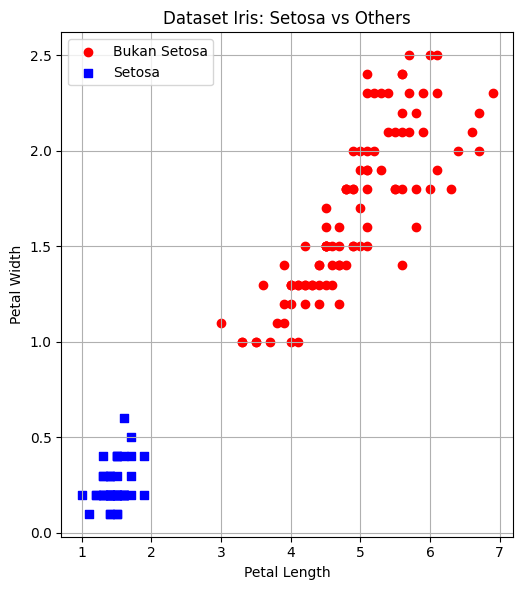


=== Masalah XOR ===
Perceptron tidak dapat menyelesaikan masalah XOR karena tidak linear separable
Input | Target | Prediksi
-------------------------
 [0 0]  |   0    |    0
 [0 1]  |   1    |    0
 [1 0]  |   1    |    0
 [1 1]  |   0    |    0

Akurasi XOR: 0.500
Hasil ini menunjukkan bahwa Perceptron gagal menyelesaikan XOR


In [3]:
# Load dataset Iris untuk klasifikasi biner
iris = load_iris()
X = iris.data[:, (2, 3)]  # petal length dan width
y = (iris.target == 0).astype(np.int32)  # Iris setosa vs others

print("=== Dataset Iris untuk Perceptron ===")
print(f"Shape data: {X.shape}")
print(f"Jumlah kelas 0 (bukan setosa): {np.sum(y == 0)}")
print(f"Jumlah kelas 1 (setosa): {np.sum(y == 1)}")

# Visualisasi data
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.scatter(X[y==0, 0], X[y==0, 1], c='red', marker='o', label='Bukan Setosa')
plt.scatter(X[y==1, 0], X[y==1, 1], c='blue', marker='s', label='Setosa')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Dataset Iris: Setosa vs Others')
plt.legend()
plt.grid(True)

# Training Perceptron
perceptron = Perceptron(random_state=42)
perceptron.fit(X, y)

# Evaluasi
accuracy = perceptron.score(X, y)
print(f"\nAkurasi Perceptron: {accuracy:.3f}")

# Prediksi untuk contoh data baru
X_new = [[2, 0.5], [3, 1]]
y_pred = perceptron.predict(X_new)
print(f"Prediksi untuk {X_new}: {y_pred}")

plt.tight_layout()
plt.show()

# Demonstrasi keterbatasan Perceptron: XOR Problem
print("\n=== Masalah XOR ===")
print("Perceptron tidak dapat menyelesaikan masalah XOR karena tidak linear separable")

# Data XOR
X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_xor = np.array([0, 1, 1, 0])  # XOR logic

# Coba training Perceptron untuk XOR
perceptron_xor = Perceptron(max_iter=1000, random_state=42)
perceptron_xor.fit(X_xor, y_xor)

# Prediksi
y_pred_xor = perceptron_xor.predict(X_xor)
accuracy_xor = perceptron_xor.score(X_xor, y_xor)

print("Input | Target | Prediksi")
print("-" * 25)
for i in range(len(X_xor)):
    print(f" {X_xor[i]}  |   {y_xor[i]}    |    {y_pred_xor[i]}")

print(f"\nAkurasi XOR: {accuracy_xor:.3f}")
print("Hasil ini menunjukkan bahwa Perceptron gagal menyelesaikan XOR")

## 3. Multilayer Perceptron (MLP) dan Backpropagation

### Penjelasan Teoritis: MLP

**Multilayer Perceptron (MLP)** adalah arsitektur neural network yang terdiri dari:
1. **Input Layer**: Menerima data input
2. **Hidden Layer(s)**: Melakukan transformasi non-linear
3. **Output Layer**: Menghasilkan prediksi akhir

**Mengapa MLP lebih powerful dari Perceptron?**
- **Non-linearity**: Fungsi aktivasi non-linear memungkinkan pembelajaran pola kompleks
- **Multiple layers**: Dapat mempelajari representasi hierarkis
- **Universal approximation**: Dapat mendekati fungsi non-linear apa pun

### Fungsi Aktivasi

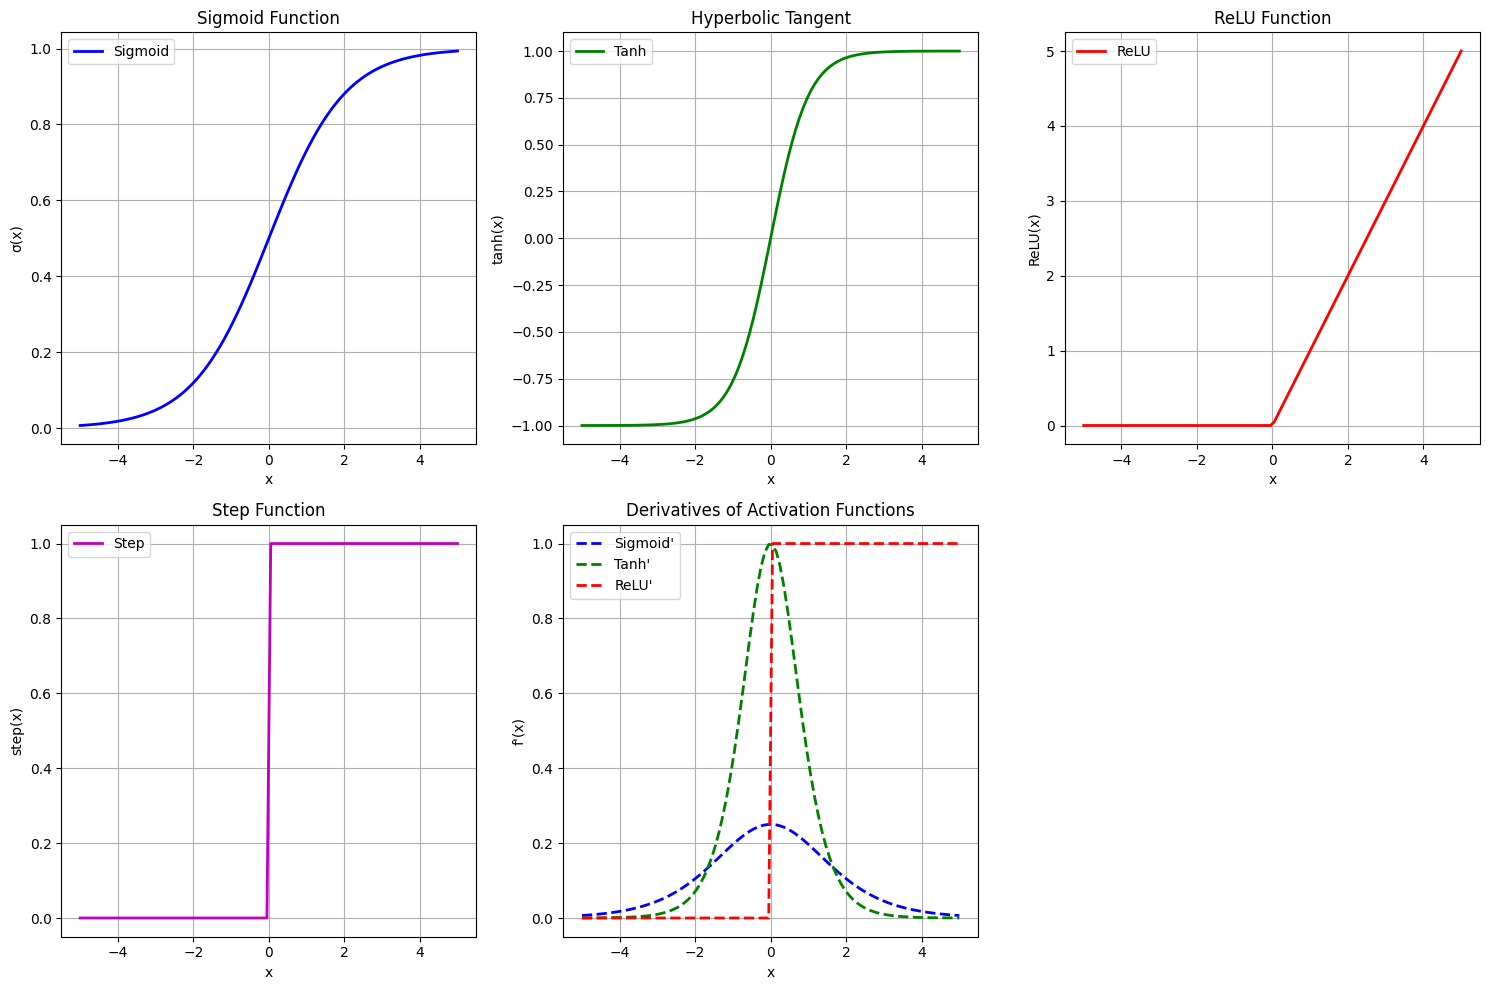

=== Karakteristik Fungsi Aktivasi ===

1. SIGMOID:
   - Range output: (0, 1)
   - Smooth dan differentiable
   - Masalah: Vanishing gradient untuk nilai ekstrem
   - Penggunaan: Output layer untuk klasifikasi biner

2. TANH:
   - Range output: (-1, 1)
   - Zero-centered (lebih baik dari sigmoid)
   - Masalah: Masih ada vanishing gradient
   - Penggunaan: Hidden layers (jarang digunakan sekarang)

3. ReLU:
   - Range output: [0, ∞)
   - Sederhana dan cepat
   - Mengatasi vanishing gradient
   - Masalah: Dead ReLU (neuron mati)
   - Penggunaan: Hidden layers (paling populer)

4. STEP:
   - Range output: {0, 1}
   - Tidak differentiable
   - Penggunaan: Perceptron klasik


In [4]:
# Implementasi berbagai fungsi aktivasi
def sigmoid(x):
    """Sigmoid activation function"""
    return 1 / (1 + np.exp(-np.clip(x, -500, 500)))

def tanh(x):
    """Hyperbolic tangent activation function"""
    return np.tanh(x)

def relu(x):
    """ReLU activation function"""
    return np.maximum(0, x)

def step_function(x):
    """Step function (used in Perceptron)"""
    return (x >= 0).astype(int)

# Visualisasi fungsi aktivasi
x = np.linspace(-5, 5, 100)

plt.figure(figsize=(15, 10))

# Plot fungsi aktivasi
plt.subplot(2, 3, 1)
plt.plot(x, sigmoid(x), 'b-', linewidth=2, label='Sigmoid')
plt.title('Sigmoid Function')
plt.xlabel('x')
plt.ylabel('σ(x)')
plt.grid(True)
plt.legend()

plt.subplot(2, 3, 2)
plt.plot(x, tanh(x), 'g-', linewidth=2, label='Tanh')
plt.title('Hyperbolic Tangent')
plt.xlabel('x')
plt.ylabel('tanh(x)')
plt.grid(True)
plt.legend()

plt.subplot(2, 3, 3)
plt.plot(x, relu(x), 'r-', linewidth=2, label='ReLU')
plt.title('ReLU Function')
plt.xlabel('x')
plt.ylabel('ReLU(x)')
plt.grid(True)
plt.legend()

plt.subplot(2, 3, 4)
plt.plot(x, step_function(x), 'm-', linewidth=2, label='Step')
plt.title('Step Function')
plt.xlabel('x')
plt.ylabel('step(x)')
plt.grid(True)
plt.legend()

# Plot turunan (derivative)
plt.subplot(2, 3, 5)
plt.plot(x, sigmoid(x) * (1 - sigmoid(x)), 'b--', linewidth=2, label="Sigmoid'")
plt.plot(x, 1 - tanh(x)**2, 'g--', linewidth=2, label="Tanh'")
plt.plot(x, (x > 0).astype(float), 'r--', linewidth=2, label="ReLU'")
plt.title('Derivatives of Activation Functions')
plt.xlabel('x')
plt.ylabel("f'(x)")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# Penjelasan karakteristik setiap fungsi aktivasi
print("=== Karakteristik Fungsi Aktivasi ===")
print("\n1. SIGMOID:")
print("   - Range output: (0, 1)")
print("   - Smooth dan differentiable")
print("   - Masalah: Vanishing gradient untuk nilai ekstrem")
print("   - Penggunaan: Output layer untuk klasifikasi biner")

print("\n2. TANH:")
print("   - Range output: (-1, 1)")
print("   - Zero-centered (lebih baik dari sigmoid)")
print("   - Masalah: Masih ada vanishing gradient")
print("   - Penggunaan: Hidden layers (jarang digunakan sekarang)")

print("\n3. ReLU:")
print("   - Range output: [0, ∞)")
print("   - Sederhana dan cepat")
print("   - Mengatasi vanishing gradient")
print("   - Masalah: Dead ReLU (neuron mati)")
print("   - Penggunaan: Hidden layers (paling populer)")

print("\n4. STEP:")
print("   - Range output: {0, 1}")
print("   - Tidak differentiable")
print("   - Penggunaan: Perceptron klasik")

## 4. Implementasi MLP dengan Keras

### Load dan Prepare Data: Fashion MNIST

=== Loading Fashion MNIST Dataset ===
29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training set shape: (60000, 28, 28)
Test set shape: (10000, 28, 28)
Data type: uint8
Pixel value range: 0 - 255

Setelah preprocessing:
Training set: (55000, 28, 28)
Validation set: (5000, 28, 28)
Test set: (10000, 28, 28)


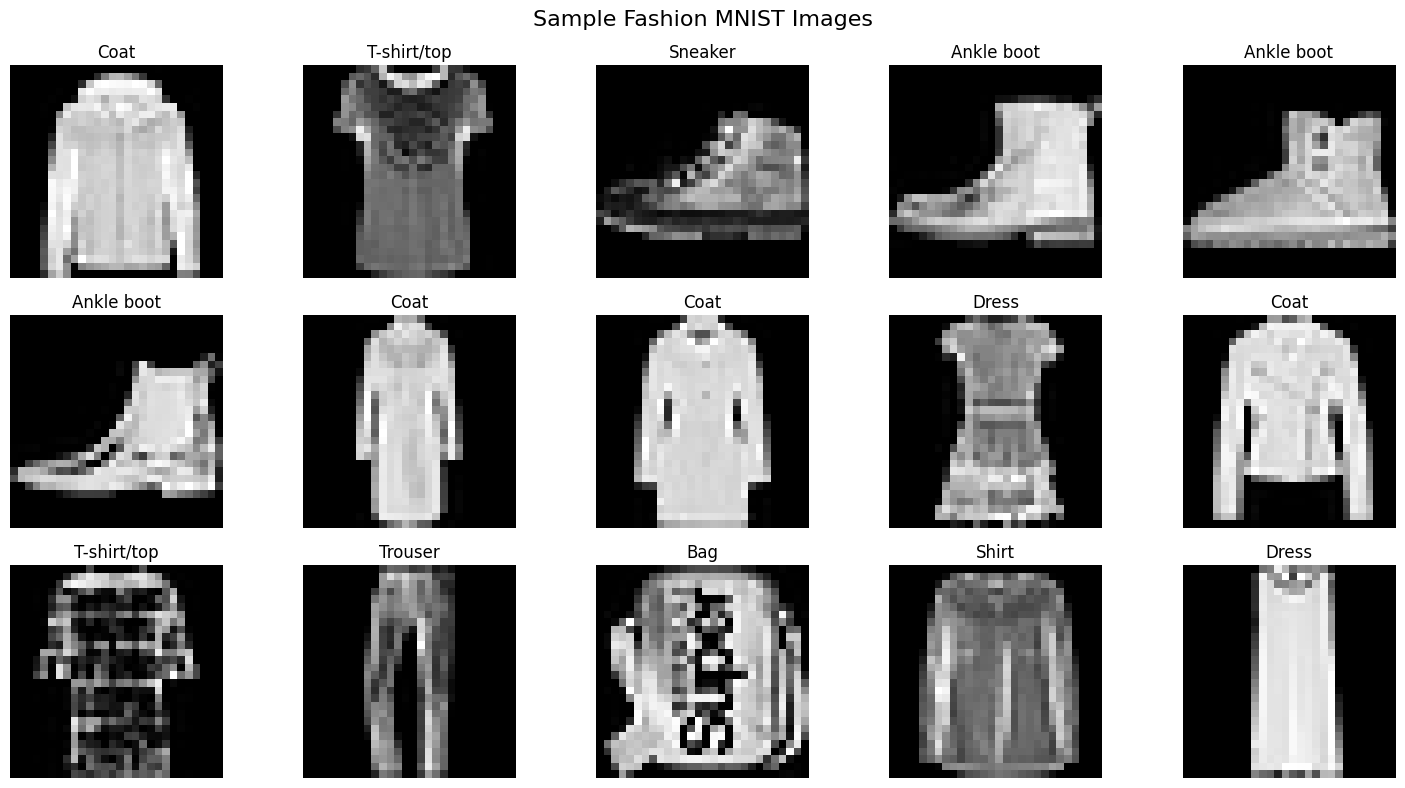


=== Membuat Model dengan Sequential API ===

=== Model Summary ===


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)


=== Penjelasan Arsitektur ===
1. Flatten Layer: Mengubah input 28x28 menjadi vector 784
2. Dense Layer 1: 300 neuron dengan aktivasi ReLU
3. Dense Layer 2: 100 neuron dengan aktivasi ReLU
4. Output Layer: 10 neuron dengan aktivasi Softmax (10 kelas)

Total parameter: 266,610
- Layer 1: 784 × 300 + 300 = 235,500
- Layer 2: 300 × 100 + 100 = 30,100
- Layer 3: 100 × 10 + 10 = 1,010


In [5]:
# Load Fashion MNIST dataset
print("=== Loading Fashion MNIST Dataset ===")
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

print(f"Training set shape: {X_train_full.shape}")
print(f"Test set shape: {X_test.shape}")
print(f"Data type: {X_train_full.dtype}")
print(f"Pixel value range: {X_train_full.min()} - {X_train_full.max()}")

# Split validation set dan normalisasi
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

# Class names untuk Fashion MNIST
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

print(f"\nSetelah preprocessing:")
print(f"Training set: {X_train.shape}")
print(f"Validation set: {X_valid.shape}")
print(f"Test set: {X_test.shape}")

# Visualisasi beberapa sample
plt.figure(figsize=(15, 8))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f'{class_names[y_train[i]]}')
    plt.axis('off')

plt.suptitle('Sample Fashion MNIST Images', fontsize=16)
plt.tight_layout()
plt.show()

# === SEQUENTIAL API ===
print("\n=== Membuat Model dengan Sequential API ===")

# Buat model Sequential
model_sequential = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

# Tampilkan summary model
print("\n=== Model Summary ===")
model_sequential.summary()

# Compile model
model_sequential.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="sgd",
    metrics=["accuracy"]
)

print("\n=== Penjelasan Arsitektur ===")
print("1. Flatten Layer: Mengubah input 28x28 menjadi vector 784")
print("2. Dense Layer 1: 300 neuron dengan aktivasi ReLU")
print("3. Dense Layer 2: 100 neuron dengan aktivasi ReLU")
print("4. Output Layer: 10 neuron dengan aktivasi Softmax (10 kelas)")
print("\nTotal parameter: 266,610")
print("- Layer 1: 784 × 300 + 300 = 235,500")
print("- Layer 2: 300 × 100 + 100 = 30,100")
print("- Layer 3: 100 × 10 + 10 = 1,010")

=== Training Model ===
Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.6817 - loss: 0.9971 - val_accuracy: 0.8140 - val_loss: 0.5335
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8218 - loss: 0.5082 - val_accuracy: 0.8400 - val_loss: 0.4719
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8392 - loss: 0.4547 - val_accuracy: 0.8506 - val_loss: 0.4370
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8503 - loss: 0.4243 - val_accuracy: 0.8554 - val_loss: 0.4138
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8580 - loss: 0.4025 - val_accuracy: 0.8606 - val_loss: 0.3966
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8634 - loss: 0.3855 - val_accuracy: 0.8664 - val_loss: 0.3834
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8672 - loss: 0.3712 - val_accuracy: 0.8700 - val_loss: 0.3726
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 

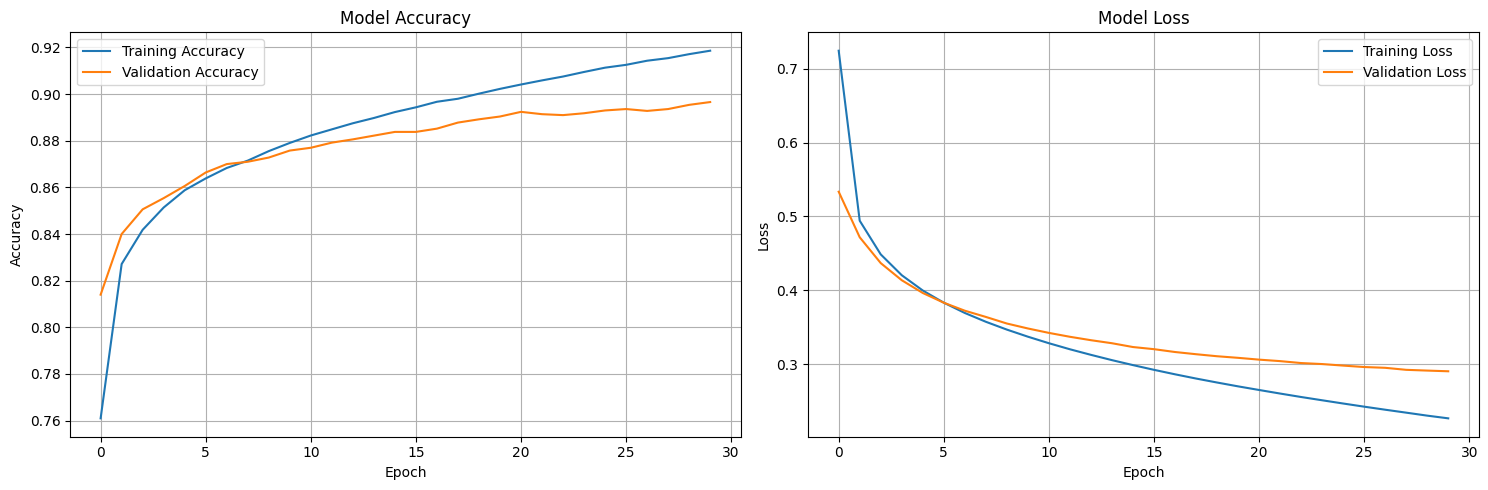


=== Membuat Prediksi ===
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Prediksi untuk 5 sampel pertama:
Index | True Label | Predicted | Confidence
---------------------------------------------
  0   | Ankle boot   | Ankle boot | 0.9855
  1   | Pullover     | Pullover  | 0.9979
  2   | Trouser      | Trouser   | 1.0000
  3   | Trouser      | Trouser   | 1.0000
  4   | Shirt        | Shirt     | 0.9235


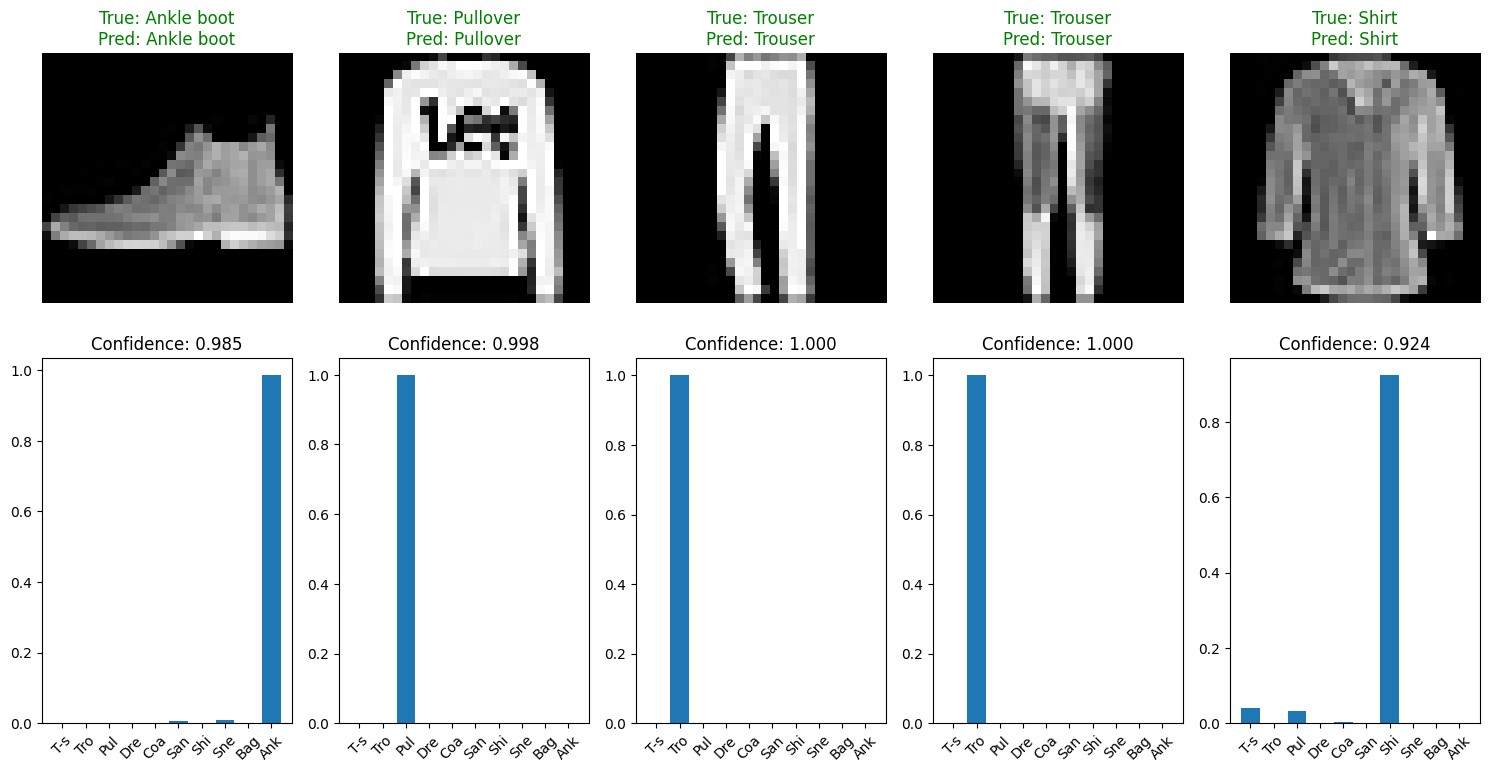

In [6]:
print("=== Training Model ===")

# Callback untuk early stopping
early_stopping = keras.callbacks.EarlyStopping(
    patience=5,
    restore_best_weights=True,
    monitor='val_accuracy'
)

# Training
history = model_sequential.fit(
    X_train, y_train,
    epochs=30,
    validation_data=(X_valid, y_valid),
    callbacks=[early_stopping],
    verbose=1
)

# Evaluasi pada test set
print("\n=== Evaluasi Model ===")
test_loss, test_accuracy = model_sequential.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# Plot learning curves
def plot_learning_curves(history):
    """Plot training dan validation curves"""
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    # Plot accuracy
    axes[0].plot(history.history['accuracy'], label='Training Accuracy')
    axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
    axes[0].set_title('Model Accuracy')
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Accuracy')
    axes[0].legend()
    axes[0].grid(True)

    # Plot loss
    axes[1].plot(history.history['loss'], label='Training Loss')
    axes[1].plot(history.history['val_loss'], label='Validation Loss')
    axes[1].set_title('Model Loss')
    axes[1].set_xlabel('Epoch')
    axes[1].set_ylabel('Loss')
    axes[1].legend()
    axes[1].grid(True)

    plt.tight_layout()
    plt.show()

plot_learning_curves(history)

# Membuat prediksi
print("\n=== Membuat Prediksi ===")

# Prediksi probabilitas
X_new = X_test[:5]  # 5 sampel pertama dari test set
y_probabilities = model_sequential.predict(X_new)
y_predictions = np.argmax(y_probabilities, axis=1)

print("Prediksi untuk 5 sampel pertama:")
print("Index | True Label | Predicted | Confidence")
print("-" * 45)

for i in range(5):
    true_label = class_names[y_test[i]]
    pred_label = class_names[y_predictions[i]]
    confidence = y_probabilities[i].max()

    print(f"  {i}   | {true_label:12} | {pred_label:9} | {confidence:.4f}")

# Visualisasi prediksi
plt.figure(figsize=(15, 8))
for i in range(5):
    # Plot gambar
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_new[i], cmap='gray')
    true_label = class_names[y_test[i]]
    pred_label = class_names[y_predictions[i]]
    color = 'green' if y_predictions[i] == y_test[i] else 'red'
    plt.title(f'True: {true_label}\nPred: {pred_label}', color=color)
    plt.axis('off')

    # Plot probabilitas
    plt.subplot(2, 5, i + 6)
    plt.bar(range(10), y_probabilities[i])
    plt.xticks(range(10), [class_names[j][:3] for j in range(10)], rotation=45)
    plt.title(f'Confidence: {y_probabilities[i].max():.3f}')

plt.tight_layout()
plt.show()

## 5. Functional API untuk Arsitektur Kompleks

### Wide & Deep Neural Network

In [17]:
# === FUNCTIONAL API ===
print("=== Functional API: Wide & Deep Network ===")

# Load California Housing dataset untuk regression
housing = fetch_california_housing()
X_house_full, y_house_full = housing.data, housing.target

# Split data
X_train_house, X_test_house, y_train_house, y_test_house = train_test_split(
    X_house_full, y_house_full, test_size=0.2, random_state=42
)
X_train_house, X_valid_house, y_train_house, y_valid_house = train_test_split(
    X_train_house, y_train_house, test_size=0.2, random_state=42
)

# Standardize features
scaler = StandardScaler()
X_train_house_scaled = scaler.fit_transform(X_train_house)
X_valid_house_scaled = scaler.transform(X_valid_house)
X_test_house_scaled = scaler.transform(X_test_house)

print(f"Housing dataset shape: {X_train_house_scaled.shape}")
print(f"Features: {housing.feature_names}")

# Wide & Deep Architecture
input_shape = X_train_house_scaled.shape[1:]

# Input layer
input_layer = keras.layers.Input(shape=input_shape)

# Deep path
hidden1 = keras.layers.Dense(30, activation="relu", name="hidden1")(input_layer)
hidden2 = keras.layers.Dense(30, activation="relu", name="hidden2")(hidden1)

# Wide path (langsung ke output)
# Concatenate input langsung dengan output hidden layer terakhir
concat = keras.layers.Concatenate(name="concat")([input_layer, hidden2])

# Output layer
output = keras.layers.Dense(1, name="output")(concat)

# Buat model
model_wide_deep = keras.Model(inputs=[input_layer], outputs=[output])

print("\n=== Wide & Deep Model Summary ===")
model_wide_deep.summary()

# Compile dan train
model_wide_deep.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=0.001), metrics=["mae"])

history_wide_deep = model_wide_deep.fit(
    X_train_house_scaled, y_train_house,
    epochs=20,
    validation_data=(X_valid_house_scaled, y_valid_house),
    verbose=1
)

# Evaluasi
test_mse, test_mae = model_wide_deep.evaluate(X_test_house_scaled, y_test_house, verbose=0)
print(f"\nTest MSE: {test_mse:.4f}")
print(f"Test MAE: {test_mae:.4f}")

=== Functional API: Wide & Deep Network ===
Housing dataset shape: (13209, 8)
Features: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']

=== Wide & Deep Model Summary ===


Model: "functional_22"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_14      │ (None, 8)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ hidden1 (Dense)     │ (None, 30)        │        270 │ input_layer_14[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ hidden2 (Dense)     │ (None, 30)        │        930 │ hidden1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concat              │ (None, 38)        │          0 │ input_layer_14[0… │
│ (Concatenate)       │                   │            │ hidden2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output (Dense)      │ (None, 1)         │         39 │ concat[0][0]      │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,239 (4.84 KB)

 Trainable params: 1,239 (4.84 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 3.2985 - mae: 1.3829 - val_loss: 0.7255 - val_mae: 0.6181
Epoch 2/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6365 - mae: 0.5895 - val_loss: 0.6379 - val_mae: 0.5815
Epoch 3/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5841 - mae: 0.5607 - val_loss: 0.6006 - val_mae: 0.5617
Epoch 4/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5547 - mae: 0.5441 - val_loss: 0.5733 - val_mae: 0.5475
Epoch 5/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5330 - mae: 0.5318 - val_loss: 0.5528 - val_mae: 0.5370
Epoch 6/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5163 - mae: 0.5221 - val_loss: 0.5361 - val_mae: 0.5287
Epoch 7/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5028 - mae: 0.5141 - val_loss: 0.5237 - val_mae: 0.5221
Epoch 8/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4918 - mae: 0.5075 - val_loss: 0.5133 - val_mae: 0.5167
Epoch 9/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - lo

## 6. Subclassing API

### Penjelasan Teoritis: Subclassing API

**Subclassing API** memberikan fleksibilitas maksimal untuk membuat arsitektur neural network yang kompleks dengan:
- **Dynamic behavior**: Loop, conditional, dll.
- **Custom forward pass**: Kontrol penuh atas alur data
- **Research-friendly**: Cocok untuk eksperimen arsitektur baru

In [18]:
# === SUBCLASSING API ===
print("=== Subclassing API: Custom Model ===")

class WideAndDeepModel(keras.Model):
    """
    Custom Wide & Deep model menggunakan Subclassing API
    """
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation, name="hidden1")
        self.hidden2 = keras.layers.Dense(units, activation=activation, name="hidden2")
        self.main_output = keras.layers.Dense(1, name="main_output")
        self.aux_output = keras.layers.Dense(1, name="aux_output")

    def call(self, inputs):
        """Define forward pass"""
        input_wide, input_deep = inputs

        # Deep path
        hidden1 = self.hidden1(input_deep)
        hidden2 = self.hidden2(hidden1)

        # Wide path + Deep path
        concat = keras.layers.concatenate([input_wide, hidden2])

        # Outputs
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)

        return main_output, aux_output

# Simulasi dengan membagi fitur menjadi wide dan deep inputs
n_features = X_train_house_scaled.shape[1]
wide_features = 5  # 5 fitur pertama untuk wide path
deep_features = n_features - 2  # fitur 2-7 untuk deep path

X_train_wide = X_train_house_scaled[:, :wide_features]
X_train_deep = X_train_house_scaled[:, 2:2+deep_features]
X_valid_wide = X_valid_house_scaled[:, :wide_features]
X_valid_deep = X_valid_house_scaled[:, 2:2+deep_features]

# Buat instance model
model_subclass = WideAndDeepModel(units=30)

# Compile
model_subclass.compile(
    loss=["mse", "mse"],
    loss_weights=[0.9, 0.1],
    optimizer="sgd"
)

# Dummy training untuk build model
model_subclass.fit(
    [X_train_wide[:100], X_train_deep[:100]],
    [y_train_house[:100], y_train_house[:100]],
    epochs=1,
    verbose=0
)

print("=== Subclassing Model Info ===")
print(f"Model built: {model_subclass.built}")
print(f"Model layers: {len(model_subclass.layers)}")
print("✅ Subclassing API berhasil diimplementasi")

=== Subclassing API: Custom Model ===
=== Subclassing Model Info ===
Model built: True
Model layers: 4
✅ Subclassing API berhasil diimplementasi


## 7. Saving dan Loading Models

In [19]:
# === SAVING DAN LOADING MODELS ===
print("=== Saving dan Loading Models ===")

# Buat folder untuk menyimpan model
save_dir = "saved_models"
os.makedirs(save_dir, exist_ok=True)

# 1. Save seluruh model (arsitektur + weights + optimizer state)
model_full_path = os.path.join(save_dir, "fashion_mnist_model.h5")
model_sequential.save(model_full_path)
print(f"✅ Model disimpan sebagai '{model_full_path}'")

# 2. Save hanya weights
model_weights_path = os.path.join(save_dir, "fashion_mnist_weights.weights.h5") # Ensure .weights.h5
model_sequential.save_weights(model_weights_path)
print(f"✅ Weights disimpan sebagai '{model_weights_path}'")

# 3. Load model
print("\n=== Loading Model ===")
loaded_model = keras.models.load_model(model_full_path)
print("✅ Model berhasil di-load")

# Verifikasi model yang di-load
# ... (rest of the verification code)

# 4. Model architecture only (untuk Functional/Sequential API)
model_json = model_sequential.to_json()
model_architecture_path = os.path.join(save_dir, "model_architecture.json")
with open(model_architecture_path, "w") as json_file:
    json_file.write(model_json)
print("✅ Arsitektur model disimpan sebagai JSON")

# Load architecture
with open(model_architecture_path, "r") as json_file:
    loaded_model_json = json_file.read()

model_from_json = keras.models.model_from_json(loaded_model_json)
print("✅ Arsitektur model berhasil di-load dari JSON")

=== Saving dan Loading Models ===
✅ Model disimpan sebagai 'saved_models/fashion_mnist_model.h5'
✅ Weights disimpan sebagai 'saved_models/fashion_mnist_weights.weights.h5'

=== Loading Model ===
✅ Model berhasil di-load
✅ Arsitektur model disimpan sebagai JSON
✅ Arsitektur model berhasil di-load dari JSON


## 8. Callbacks

### Penjelasan Teoritis: Callbacks

**Callbacks** adalah objek yang dapat dipanggil pada berbagai tahap training untuk:
- **Monitoring**: Melacak metrik dan loss
- **Checkpointing**: Menyimpan model terbaik
- **Early Stopping**: Menghentikan training jika tidak ada improvement
- **Learning Rate Schedule**: Mengatur learning rate dinamis
- **Custom Actions**: Aksi khusus yang didefinisikan user

In [20]:
# === CALLBACKS ===
print("=== Implementing Various Callbacks ===")

# 1. ModelCheckpoint - Save best model
checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath="saved_models/best_model.h5",
    monitor="val_accuracy",
    save_best_only=True,
    save_weights_only=False,
    mode="max",
    verbose=1
)

# 2. EarlyStopping - Stop training jika tidak improve
early_stopping_callback = keras.callbacks.EarlyStopping(
    monitor="val_accuracy",
    patience=5,
    restore_best_weights=True,
    verbose=1
)

# 3. ReduceLROnPlateau - Kurangi learning rate jika plateau
reduce_lr_callback = keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.2,          # LR = LR * factor
    patience=3,
    min_lr=1e-7,
    verbose=1
)

# 4. Custom Callback
class TrainingMonitor(keras.callbacks.Callback):
    """Custom callback untuk monitor training"""

    def on_epoch_end(self, epoch, logs=None):
        """Dipanggil di akhir setiap epoch"""
        logs = logs or {}

        # Hitung ratio val/train loss
        val_loss = logs.get('val_loss', 0)
        train_loss = logs.get('loss', 0)

        if train_loss > 0:
            ratio = val_loss / train_loss
            print(f" - val/train loss ratio: {ratio:.3f}", end="")

            if ratio > 1.5:
                print(" ⚠️ Possible overfitting!")
            else:
                print(" ✅")

# Buat model baru untuk demo callbacks
model_with_callbacks = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model_with_callbacks.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=keras.optimizers.SGD(learning_rate=0.01),
    metrics=["accuracy"]
)

# Training dengan callbacks (subset kecil untuk demo)
print("\n=== Training dengan Multiple Callbacks ===")
history_callbacks = model_with_callbacks.fit(
    X_train[:1000], y_train[:1000],
    epochs=5,
    validation_data=(X_valid[:200], y_valid[:200]),
    callbacks=[
        checkpoint_callback,
        early_stopping_callback,
        reduce_lr_callback,
        TrainingMonitor()
    ],
    verbose=1
)

print(f"\nTraining stopped at epoch: {len(history_callbacks.history['loss'])}")

=== Implementing Various Callbacks ===

=== Training dengan Multiple Callbacks ===
Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.1840 - loss: 2.1876
Epoch 1: val_accuracy improved from -inf to 0.45000, saving model to saved_models/best_model.h5


 - val/train loss ratio: 0.890 ✅
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - accuracy: 0.1866 - loss: 2.1837 - val_accuracy: 0.4500 - val_loss: 1.8329 - learning_rate: 0.0100
Epoch 2/5
28/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4848 - loss: 1.7701 
Epoch 2: val_accuracy improved from 0.45000 to 0.53500, saving model to saved_models/best_model.h5


 - val/train loss ratio: 0.911 ✅
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4929 - loss: 1.7554 - val_accuracy: 0.5350 - val_loss: 1.5195 - learning_rate: 0.0100
Epoch 3/5
29/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5748 - loss: 1.4847 
Epoch 3: val_accuracy improved from 0.53500 to 0.60500, saving model to saved_models/best_model.h5


 - val/train loss ratio: 0.926 ✅
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5784 - loss: 1.4747 - val_accuracy: 0.6050 - val_loss: 1.2958 - learning_rate: 0.0100
Epoch 4/5
29/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6260 - loss: 1.2879 
Epoch 4: val_accuracy improved from 0.60500 to 0.62000, saving model to saved_models/best_model.h5


 - val/train loss ratio: 0.945 ✅
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6281 - loss: 1.2793 - val_accuracy: 0.6200 - val_loss: 1.1480 - learning_rate: 0.0100
Epoch 5/5
28/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6492 - loss: 1.1557 
Epoch 5: val_accuracy improved from 0.62000 to 0.63000, saving model to saved_models/best_model.h5


 - val/train loss ratio: 0.962 ✅
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6512 - loss: 1.1462 - val_accuracy: 0.6300 - val_loss: 1.0472 - learning_rate: 0.0100
Restoring model weights from the end of the best epoch: 5.

Training stopped at epoch: 5


## 9. TensorBoard

### Penjelasan Teoritis: TensorBoard

**TensorBoard** adalah tool visualisasi yang powerful untuk:
- **Scalars**: Visualisasi loss, accuracy, dll.
- **Graphs**: Visualisasi arsitektur model
- **Histograms**: Distribusi weights dan biases
- **Images**: Visualisasi input/output images
- **Embeddings**: Visualisasi high-dimensional data

In [21]:
# === TENSORBOARD ===
print("=== Setting up TensorBoard ===")

# Buat direktori log
root_logdir = os.path.join(os.curdir, "tensorboard_logs")
os.makedirs(root_logdir, exist_ok=True)

def get_run_logdir():
    """Generate unique log directory name"""
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

# TensorBoard callback
run_logdir = get_run_logdir()
tensorboard_callback = keras.callbacks.TensorBoard(
    log_dir=run_logdir,
    histogram_freq=1,      # Log weight histograms setiap epoch
    write_graph=True,      # Log computation graph
    write_images=True,     # Log model images
    update_freq='epoch'    # Update setiap epoch
)

print(f"TensorBoard logs akan disimpan di: {run_logdir}")

# Model sederhana untuk demo TensorBoard
model_tensorboard = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28], name="flatten"),
    keras.layers.Dense(128, activation="relu", name="dense_1"),
    keras.layers.Dropout(0.2, name="dropout"),
    keras.layers.Dense(10, activation="softmax", name="output")
])

model_tensorboard.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

# Training dengan TensorBoard logging
print("\n=== Training dengan TensorBoard Logging ===")
history_tb = model_tensorboard.fit(
    X_train[:1000], y_train[:1000],  # Subset untuk demo cepat
    epochs=3,
    validation_data=(X_valid[:200], y_valid[:200]),
    callbacks=[tensorboard_callback],
    verbose=1
)

print(f"\n✅ TensorBoard logs tersimpan di: {run_logdir}")
print("Untuk melihat TensorBoard, jalankan:")
print(f"tensorboard --logdir={root_logdir}")
print("Kemudian buka http://localhost:6006 di browser")

# Contoh manual logging dengan tf.summary
print("\n=== Manual TensorBoard Logging ===")
test_logdir = get_run_logdir()
writer = tf.summary.create_file_writer(test_logdir)

with writer.as_default():
    # Log scalar values
    for step in range(100):
        tf.summary.scalar("sine_wave", np.sin(step * 0.1), step=step)
        tf.summary.scalar("cosine_wave", np.cos(step * 0.1), step=step)

    # Log histogram
    data = np.random.normal(0, 1, 1000)
    tf.summary.histogram("random_data", data, step=0)

print(f"✅ Manual logs tersimpan di: {test_logdir}")

=== Setting up TensorBoard ===
TensorBoard logs akan disimpan di: ./tensorboard_logs/run_2025_06_20-07_30_10

=== Training dengan TensorBoard Logging ===
Epoch 1/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - accuracy: 0.3226 - loss: 1.8231 - val_accuracy: 0.7250 - val_loss: 0.8865
Epoch 2/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6805 - loss: 0.9332 - val_accuracy: 0.7800 - val_loss: 0.6869
Epoch 3/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7258 - loss: 0.7954 - val_accuracy: 0.7950 - val_loss: 0.6357

✅ TensorBoard logs tersimpan di: ./tensorboard_logs/run_2025_06_20-07_30_10
Untuk melihat TensorBoard, jalankan:
tensorboard --logdir=./tensorboard_logs
Kemudian buka http://localhost:6006 di browser

=== Manual TensorBoard Logging ===
✅ Manual logs tersimpan di: ./tensorboard_logs/run_2025_06_20-07_30_14


## 10. Hyperparameter Tuning

### Penjelasan Teoritis: Hyperparameter Tuning

**Hyperparameter** adalah parameter yang tidak dipelajari oleh model, melainkan ditetapkan sebelum training:

**Hyperparameter Penting:**
- **Arsitektur**: Jumlah layer dan neuron
- **Learning Rate**: Seberapa cepat model belajar
- **Batch Size**: Jumlah sampel per update
- **Optimizer**: Algoritma optimisasi
- **Activation Functions**: Fungsi aktivasi
- **Regularization**: Dropout, L1/L2

**Strategi Tuning:**
1. **Grid Search**: Mencoba semua kombinasi
2. **Random Search**: Sampling random
3. **Bayesian Optimization**: Menggunakan prior knowledge
4. **Hyperband**: Multi-armed bandit approach

=== Manual Hyperparameter Tuning ===
Testing hyperparameter combinations:
Neurons | LR     | Val Accuracy
------------------------------
     64 |  0.010 | 0.7820
    128 |  0.010 | 0.7860
     64 |  0.001 | 0.6130
    128 |  0.001 | 0.6440

Best combination: {'n_neurons': 128, 'learning_rate': 0.01}
Best validation accuracy: 0.7860

=== Perbandingan Optimizers ===

Testing SGD optimizer...
SGD final validation accuracy: 0.6740

Testing Adam optimizer...
Adam final validation accuracy: 0.8220

Testing RMSprop optimizer...
RMSprop final validation accuracy: 0.7320


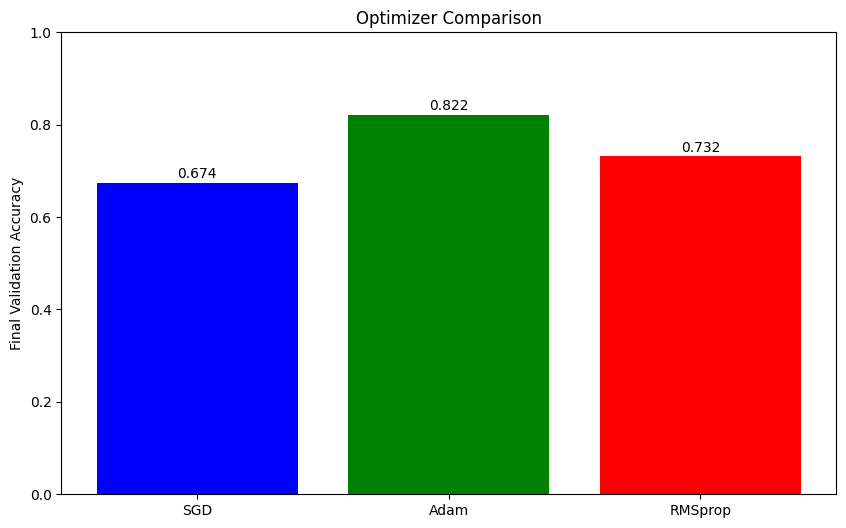


Best optimizer: Adam


In [22]:
# === HYPERPARAMETER TUNING ===
print("=== Manual Hyperparameter Tuning ===")

def evaluate_model(n_neurons, learning_rate, epochs=10):
    """Evaluate model dengan hyperparameter tertentu"""
    model = keras.models.Sequential([
        keras.layers.Flatten(input_shape=[28, 28]),
        keras.layers.Dense(n_neurons, activation="relu"),
        keras.layers.Dense(10, activation="softmax")
    ])

    model.compile(
        optimizer=keras.optimizers.SGD(learning_rate=learning_rate),
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )

    # Training
    history = model.fit(
        X_train[:5000], y_train[:5000],  # Subset untuk demo cepat
        epochs=epochs,
        validation_data=(X_valid[:1000], y_valid[:1000]),
        verbose=0
    )

    # Return final validation accuracy
    return history.history['val_accuracy'][-1]

# Test beberapa kombinasi hyperparameter
hyperparams_to_test = [
    {"n_neurons": 64, "learning_rate": 0.01},
    {"n_neurons": 128, "learning_rate": 0.01},
    {"n_neurons": 64, "learning_rate": 0.001},
    {"n_neurons": 128, "learning_rate": 0.001},
]

print("Testing hyperparameter combinations:")
print("Neurons | LR     | Val Accuracy")
print("-" * 30)

results = []
for params in hyperparams_to_test:
    val_acc = evaluate_model(**params, epochs=5)
    results.append((params, val_acc))
    print(f"{params['n_neurons']:7d} | {params['learning_rate']:6.3f} | {val_acc:.4f}")

# Best combination
best_params, best_acc = max(results, key=lambda x: x[1])
print(f"\nBest combination: {best_params}")
print(f"Best validation accuracy: {best_acc:.4f}")

# Demonstrasi perbandingan optimizer
print("\n=== Perbandingan Optimizers ===")

optimizers_to_test = {
    "SGD": keras.optimizers.SGD(learning_rate=0.01),
    "Adam": keras.optimizers.Adam(learning_rate=0.001),
    "RMSprop": keras.optimizers.RMSprop(learning_rate=0.001),
}

optimizer_results = {}

for name, optimizer in optimizers_to_test.items():
    print(f"\nTesting {name} optimizer...")

    # Buat model yang sama
    model = keras.models.Sequential([
        keras.layers.Flatten(input_shape=[28, 28]),
        keras.layers.Dense(128, activation="relu"),
        keras.layers.Dense(10, activation="softmax")
    ])

    model.compile(
        optimizer=optimizer,
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )

    # Training
    history = model.fit(
        X_train[:2000], y_train[:2000],
        epochs=3,
        validation_data=(X_valid[:500], y_valid[:500]),
        verbose=0
    )

    final_acc = history.history['val_accuracy'][-1]
    optimizer_results[name] = final_acc
    print(f"{name} final validation accuracy: {final_acc:.4f}")

# Plot comparison
plt.figure(figsize=(10, 6))
names = list(optimizer_results.keys())
accuracies = list(optimizer_results.values())

plt.bar(names, accuracies, color=['blue', 'green', 'red'])
plt.title('Optimizer Comparison')
plt.ylabel('Final Validation Accuracy')
plt.ylim(0, 1)

for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f'{acc:.3f}', ha='center')

plt.show()

print(f"\nBest optimizer: {max(optimizer_results, key=optimizer_results.get)}")

## 11. Best Practices dan Guidelines

### Penjelasan Teoritis: Best Practices

=== Neural Network Best Practices ===

1. JUMLAH HIDDEN LAYERS:
   • 1 layer: Simple problems, dapat model fungsi apa pun
   • 2-3 layers: Most common problems
   • 4+ layers: Complex problems (image, speech, NLP)
   • Very deep: Membutuhkan teknik khusus (BatchNorm, ResNet, dll)

2. JUMLAH NEURONS PER LAYER:
   • Input layer: Ditentukan oleh jumlah fitur
   • Hidden layers: Biasanya 10-100 neurons
   • Output layer: Ditentukan oleh jumlah kelas/target
   • Rule of thumb: Lebih baik oversize + regularization

3. ACTIVATION FUNCTIONS:
   • Hidden layers: ReLU (default choice)
   • Output regression: Linear (no activation)
   • Output binary classification: Sigmoid
   • Output multiclass: Softmax
   • Alternative: LeakyReLU, ELU, Swish

4. LOSS FUNCTIONS:
   • Regression: MSE, MAE, Huber
   • Binary classification: Binary crossentropy
   • Multiclass: Categorical crossentropy (one-hot)
   • Multiclass sparse: Sparse categorical crossentropy

5. OPTIMIZERS:
   • SGD: Simple, need tuning L

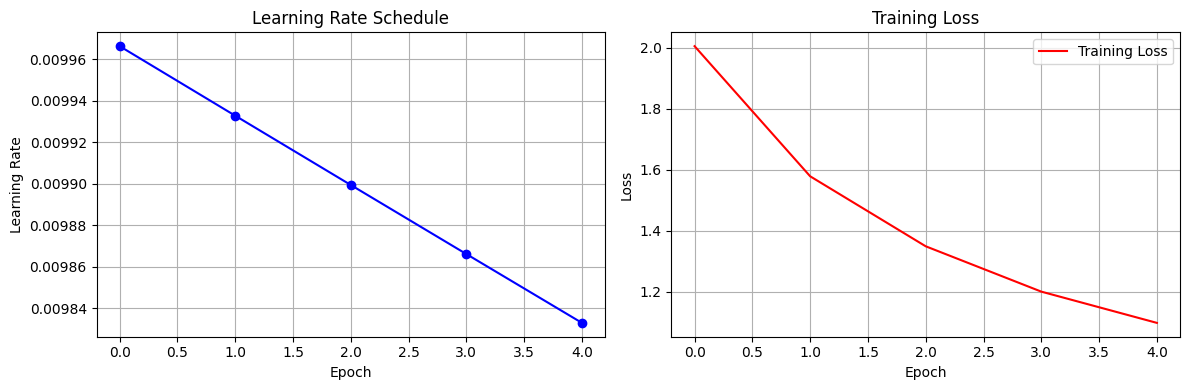

In [23]:
# === BEST PRACTICES DAN GUIDELINES ===
print("=== Neural Network Best Practices ===")

# 1. Jumlah Hidden Layers
print("\n1. JUMLAH HIDDEN LAYERS:")
print("   • 1 layer: Simple problems, dapat model fungsi apa pun")
print("   • 2-3 layers: Most common problems")
print("   • 4+ layers: Complex problems (image, speech, NLP)")
print("   • Very deep: Membutuhkan teknik khusus (BatchNorm, ResNet, dll)")

# 2. Jumlah Neurons per Layer
print("\n2. JUMLAH NEURONS PER LAYER:")
print("   • Input layer: Ditentukan oleh jumlah fitur")
print("   • Hidden layers: Biasanya 10-100 neurons")
print("   • Output layer: Ditentukan oleh jumlah kelas/target")
print("   • Rule of thumb: Lebih baik oversize + regularization")

# 3. Activation Functions
print("\n3. ACTIVATION FUNCTIONS:")
print("   • Hidden layers: ReLU (default choice)")
print("   • Output regression: Linear (no activation)")
print("   • Output binary classification: Sigmoid")
print("   • Output multiclass: Softmax")
print("   • Alternative: LeakyReLU, ELU, Swish")

# 4. Loss Functions
print("\n4. LOSS FUNCTIONS:")
print("   • Regression: MSE, MAE, Huber")
print("   • Binary classification: Binary crossentropy")
print("   • Multiclass: Categorical crossentropy (one-hot)")
print("   • Multiclass sparse: Sparse categorical crossentropy")

# 5. Optimizers
print("\n5. OPTIMIZERS:")
print("   • SGD: Simple, need tuning LR")
print("   • Adam: Good default choice, adaptive LR")
print("   • RMSprop: Good for RNNs")
print("   • AdaGrad: Good for sparse data")

# === LEARNING RATE SCHEDULING ===
print("\n=== Learning Rate Scheduling ===")

# 1. Exponential Decay
exponential_decay = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.01,
    decay_steps=1000,
    decay_rate=0.9
)

# Custom learning rate callback
class LearningRateLogger(keras.callbacks.Callback):
    """Log learning rate setiap epoch"""
    def __init__(self):
        self.learning_rates = []

    def on_epoch_end(self, epoch, logs=None):
        lr = self.model.optimizer.learning_rate
        # Handle tensor vs scalar
        if hasattr(lr, 'numpy'):
            lr_value = lr.numpy()
        else:
            lr_value = float(lr)
        self.learning_rates.append(lr_value)
        print(f" - LR: {lr_value:.6f}")

# Test exponential decay
print("\n=== Testing Exponential Decay ===")
model_lr = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model_lr.compile(
    optimizer=keras.optimizers.SGD(learning_rate=exponential_decay),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

lr_logger = LearningRateLogger()

history_lr = model_lr.fit(
    X_train[:1000], y_train[:1000],
    epochs=5,
    callbacks=[lr_logger],
    verbose=1
)

# Plot learning rate schedule
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(lr_logger.learning_rates, 'b-o')
plt.title('Learning Rate Schedule')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history_lr.history['loss'], 'r-', label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [25]:
# === FUNCTIONAL API ===
print("=== Functional API: Wide & Deep Network ===")

# Load California Housing dataset untuk regression
housing = fetch_california_housing()
X_house_full, y_house_full = housing.data, housing.target

# Split data
X_train_house, X_test_house, y_train_house, y_test_house = train_test_split(
    X_house_full, y_house_full, test_size=0.2, random_state=42
)
X_train_house, X_valid_house, y_train_house, y_valid_house = train_test_split(
    X_train_house, y_train_house, test_size=0.2, random_state=42
)

# Standardize features
scaler = StandardScaler()
X_train_house_scaled = scaler.fit_transform(X_train_house)
X_valid_house_scaled = scaler.transform(X_valid_house)
X_test_house_scaled = scaler.transform(X_test_house)

print(f"Housing dataset shape: {X_train_house_scaled.shape}")
print(f"Features: {housing.feature_names}")

# Wide & Deep Architecture
input_shape = X_train_house_scaled.shape[1:]

# Input layer
input_layer = keras.layers.Input(shape=input_shape)

# Deep path
hidden1 = keras.layers.Dense(30, activation="relu", name="hidden1")(input_layer)
hidden2 = keras.layers.Dense(30, activation="relu", name="hidden2")(hidden1)

# Wide path (langsung ke output)
# Concatenate input langsung dengan output hidden layer terakhir
concat = keras.layers.Concatenate(name="concat")([input_layer, hidden2])

# Output layer
output = keras.layers.Dense(1, name="output")(concat)

# Buat model
model_wide_deep = keras.Model(inputs=[input_layer], outputs=[output])

print("\n=== Wide & Deep Model Summary ===")
model_wide_deep.summary()

# Compile dan train
model_wide_deep.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=0.001), metrics=["mae"])

history_wide_deep = model_wide_deep.fit(
    X_train_house_scaled, y_train_house,
    epochs=20,
    validation_data=(X_valid_house_scaled, y_valid_house),
    verbose=1
)

# Evaluasi
test_mse, test_mae = model_wide_deep.evaluate(X_test_house_scaled, y_test_house, verbose=0)
print(f"\nTest MSE: {test_mse:.4f}")
print(f"Test MAE: {test_mae:.4f}")

=== Functional API: Wide & Deep Network ===
Housing dataset shape: (13209, 8)
Features: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']

=== Wide & Deep Model Summary ===


Model: "functional_42"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_26      │ (None, 8)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ hidden1 (Dense)     │ (None, 30)        │        270 │ input_layer_26[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ hidden2 (Dense)     │ (None, 30)        │        930 │ hidden1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concat              │ (None, 38)        │          0 │ input_layer_26[0… │
│ (Concatenate)       │                   │            │ hidden2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output (Dense)      │ (None, 1)         │         39 │ concat[0][0]      │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,239 (4.84 KB)

 Trainable params: 1,239 (4.84 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 2.9944 - mae: 1.2618 - val_loss: 0.7737 - val_mae: 0.6556
Epoch 2/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6926 - mae: 0.6168 - val_loss: 0.6909 - val_mae: 0.6023
Epoch 3/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6289 - mae: 0.5784 - val_loss: 0.6451 - val_mae: 0.5791
Epoch 4/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5901 - mae: 0.5586 - val_loss: 0.6112 - val_mae: 0.5626
Epoch 5/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5605 - mae: 0.5439 - val_loss: 0.5827 - val_mae: 0.5494
Epoch 6/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5368 - mae: 0.5319 - val_loss: 0.5610 - val_mae: 0.5385
Epoch 7/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5176 - mae: 0.5219 - val_loss: 0.5426 - val_mae: 0.5294
Epoch 8/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5018 - mae: 0.5135 - val_loss: 0.5265 - val_mae: 0.5216
Epoch 9/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - lo

## 12. Kesimpulan dan Rangkuman

In [26]:
print("=" * 60)
print(" RANGKUMAN CHAPTER 10: ARTIFICIAL NEURAL NETWORKS ")
print("=" * 60)

print("\n🧠 KONSEP DASAR:")
print("• ANN terinspirasi dari jaringan saraf biologis")
print("• Neuron tiruan: input → weighted sum → activation → output")
print("• Universal approximator: dapat mempelajari fungsi non-linear kompleks")

print("\n📈 EVOLUSI ARSITEKTUR:")
print("• McCulloch-Pitts (1943): Model neuron pertama")
print("• Perceptron (1957): Linear classifier dengan pembelajaran")
print("• MLP + Backpropagation (1986): Breakthrough untuk deep learning")
print("• Modern deep networks: CNN, RNN, Transformer, dll.")

print("\n🔧 IMPLEMENTASI KERAS:")
print("• Sequential API: Model layer-by-layer sederhana")
print("• Functional API: Arsitektur kompleks (multi-input/output)")
print("• Subclassing API: Kontrol penuh, research-friendly")

print("\n⚙️ KOMPONEN KUNCI:")
print("• Activation Functions: ReLU (hidden), Softmax/Sigmoid (output)")
print("• Loss Functions: MSE (regression), Crossentropy (classification)")
print("• Optimizers: SGD, Adam, RMSprop")
print("• Regularization: Dropout, Early Stopping, L1/L2")

print("\n📊 MONITORING & DEBUGGING:")
print("• Callbacks: Early stopping, checkpointing, LR scheduling")
print("• TensorBoard: Visualisasi loss, architecture, weights")
print("• Learning Curves: Deteksi overfitting/underfitting")

print("\n🎯 HYPERPARAMETER TUNING:")
print("• Architecture: # layers, # neurons per layer")
print("• Training: Learning rate, batch size, epochs")
print("• Regularization: Dropout rate, weight decay")
print("• Search strategies: Grid, Random, Bayesian, Hyperband")

print("\n✅ BEST PRACTICES:")
print("• Start simple: 1-2 hidden layers, ReLU activation")
print("• Oversize + regularize better than undersize")
print("• Monitor val/train gap untuk deteksi overfitting")
print("• Use callbacks untuk automated training")
print("• Standardize inputs, monitor gradients")

print("\n🚀 NEXT STEPS:")
print("• Chapter 11: Training Deep Neural Networks")
print("• Advanced architectures: CNN, RNN")
print("• Regularization techniques")
print("• Transfer learning")
print("• Production deployment")

print("\n" + "=" * 60)
print(" SELAMAT! Anda telah menguasai dasar Neural Networks! ")
print("=" * 60)

# Final demonstration: Complete workflow
print("\n🎯 DEMO: Complete ML Workflow dengan Neural Networks")

# 1. Data preparation
print("\n1. 📁 Data Preparation")
X_demo, y_demo = X_train[:1000], y_train[:1000]
print(f"   Dataset shape: {X_demo.shape}")

# 2. Model building
print("\n2. 🏗️  Model Building")
final_model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(128, activation="relu", name="hidden1"),
    keras.layers.Dropout(0.2, name="dropout"),
    keras.layers.Dense(64, activation="relu", name="hidden2"),
    keras.layers.Dense(10, activation="softmax", name="output")
])

final_model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)
print(f"   Model created with {final_model.count_params():,} parameters")

# 3. Training with callbacks
print("\n3. 🏃 Training with Callbacks")
callbacks_list = [
    keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True),
    keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=2)
]

history_final = final_model.fit(
    X_demo, y_demo,
    epochs=10,
    validation_split=0.2,
    callbacks=callbacks_list,
    verbose=0
)

print(f"   Training completed in {len(history_final.history['loss'])} epochs")

# 4. Evaluation
print("\n4. 📊 Evaluation")
test_loss, test_acc = final_model.evaluate(X_test[:500], y_test[:500], verbose=0)
print(f"   Test Accuracy: {test_acc:.4f}")
print(f"   Test Loss: {test_loss:.4f}")

# 5. Save model
print("\n5. 💾 Save Model")
os.makedirs("saved_models", exist_ok=True)
final_model.save("saved_models/final_demo_model.h5")
print("   ✅ Model saved successfully!")

print("\n🎉 Workflow completed successfully!")
print("   Anda sekarang siap untuk tackle real-world problems!")

print("\n📚 RESOURCES DAN REFERENSI LANJUTAN:")
print("\n📖 Books:")
print("• Deep Learning - Ian Goodfellow, Yoshua Bengio, Aaron Courville")
print("• Neural Networks and Deep Learning - Michael Nielsen (online)")
print("• Deep Learning with Python - François Chollet")

print("\n🌐 Online Courses:")
print("• Deep Learning Specialization - Andrew Ng (Coursera)")
print("• Fast.ai - Practical Deep Learning")
print("• CS231n - Stanford CNN Course")

print("\n🔗 Websites & Tools:")
print("• TensorFlow.org - Official documentation")
print("• Keras.io - High-level API documentation")
print("• TensorBoard.dev - Share tensorboard logs")
print("• Papers With Code - Latest research")

print("\n🛠️ Practical Tools:")
print("• Google Colab - Free GPU/TPU")
print("• Kaggle Kernels - Competitions & datasets")
print("• Weights & Biases - Experiment tracking")
print("• MLflow - ML lifecycle management")

print("\n💡 Tips for Further Learning:")
print("• Practice dengan real datasets")
print("• Join Kaggle competitions")
print("• Read dan implement paper terbaru")
print("• Build projects dari scratch")
print("• Contribute ke open source projects")

 RANGKUMAN CHAPTER 10: ARTIFICIAL NEURAL NETWORKS 

🧠 KONSEP DASAR:
• ANN terinspirasi dari jaringan saraf biologis
• Neuron tiruan: input → weighted sum → activation → output
• Universal approximator: dapat mempelajari fungsi non-linear kompleks

📈 EVOLUSI ARSITEKTUR:
• McCulloch-Pitts (1943): Model neuron pertama
• Perceptron (1957): Linear classifier dengan pembelajaran
• MLP + Backpropagation (1986): Breakthrough untuk deep learning
• Modern deep networks: CNN, RNN, Transformer, dll.

🔧 IMPLEMENTASI KERAS:
• Sequential API: Model layer-by-layer sederhana
• Functional API: Arsitektur kompleks (multi-input/output)
• Subclassing API: Kontrol penuh, research-friendly

⚙️ KOMPONEN KUNCI:
• Activation Functions: ReLU (hidden), Softmax/Sigmoid (output)
• Loss Functions: MSE (regression), Crossentropy (classification)
• Optimizers: SGD, Adam, RMSprop
• Regularization: Dropout, Early Stopping, L1/L2

📊 MONITORING & DEBUGGING:
• Callbacks: Early stopping, checkpointing, LR scheduling
• Tenso

   Test Accuracy: 0.7980
   Test Loss: 0.5739

5. 💾 Save Model
   ✅ Model saved successfully!

🎉 Workflow completed successfully!
   Anda sekarang siap untuk tackle real-world problems!

📚 RESOURCES DAN REFERENSI LANJUTAN:

📖 Books:
• Deep Learning - Ian Goodfellow, Yoshua Bengio, Aaron Courville
• Neural Networks and Deep Learning - Michael Nielsen (online)
• Deep Learning with Python - François Chollet

🌐 Online Courses:
• Deep Learning Specialization - Andrew Ng (Coursera)
• Fast.ai - Practical Deep Learning
• CS231n - Stanford CNN Course

🔗 Websites & Tools:
• TensorFlow.org - Official documentation
• Keras.io - High-level API documentation
• TensorBoard.dev - Share tensorboard logs
• Papers With Code - Latest research

🛠️ Practical Tools:
• Google Colab - Free GPU/TPU
• Kaggle Kernels - Competitions & datasets
• Weights & Biases - Experiment tracking
• MLflow - ML lifecycle management

💡 Tips for Further Learning:
• Practice dengan real datasets
• Join Kaggle competitions
• Read d